This notebook contains the scripts to create the plots and tables used for this project. All the original scripts are in the `scripts` folder. The purpose of this notebook is to have a single place to run all the scripts and generate the visualizations. Figures 1 - 6 are also saved as PNG images in this folder.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the dataset
df = pd.read_csv('../data/population_dynamics_clean.csv')

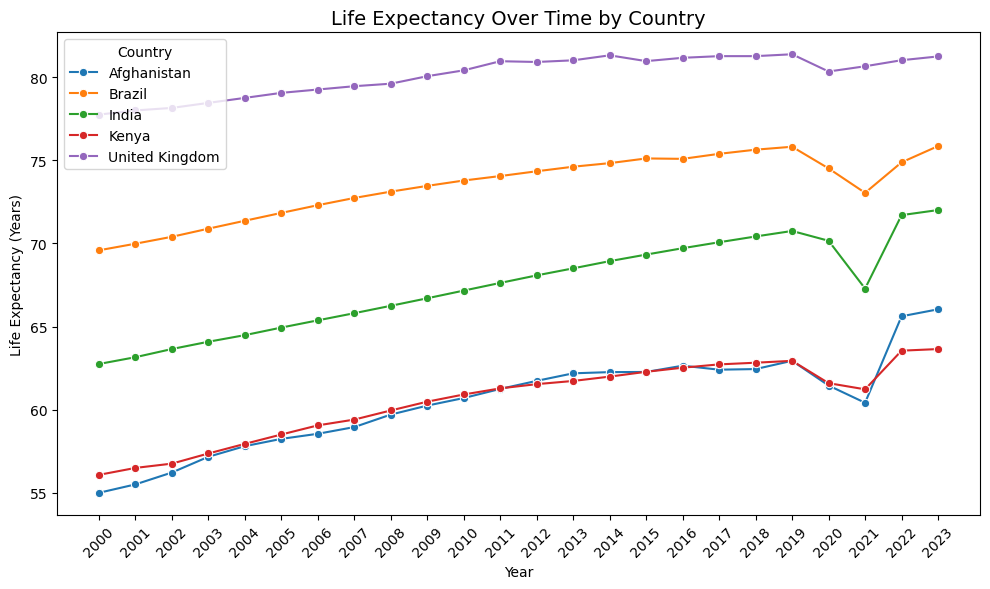

In [6]:
# Figure 1: Life Expectancy from 2000 - 2023

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="year",
    y="life_expectancy",
    hue="country",
    marker="o"
)

plt.title("Life Expectancy Over Time by Country", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Country")
plt.xticks(sorted(df['year'].unique()), rotation=45)  # Show all x-axis ticks for years
plt.tight_layout()

plt.savefig("fig-1.png", dpi=300, bbox_inches='tight')

plt.show()

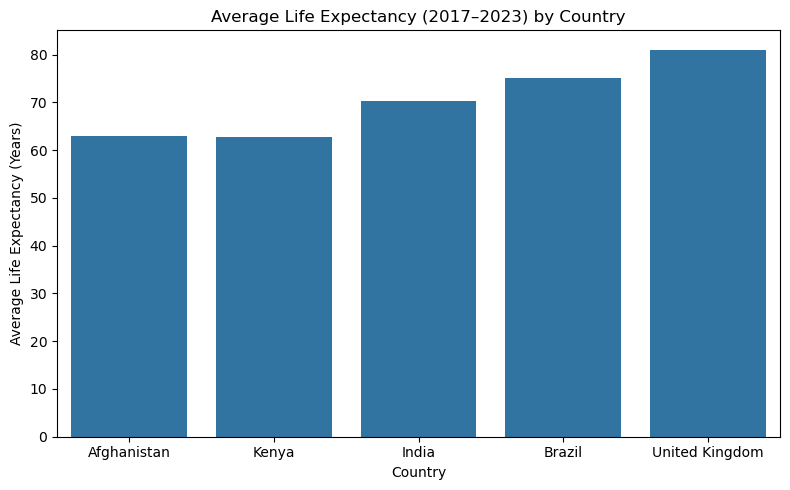

In [7]:
# Figure 2: Average Life Expectancy from 2017 - 2023

avg_life_exp = (
    df[df['year'].between(2017, 2023)]
    .groupby("country")["life_expectancy"]
    .mean()
    .reset_index()
)

country_order = ['Afghanistan', 'Kenya', 'India', 'Brazil', 'United Kingdom']

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_life_exp, x="country", y="life_expectancy", order=country_order)
plt.title("Average Life Expectancy (2017–2023) by Country")
plt.ylabel("Average Life Expectancy (Years)")
plt.xlabel("Country")
plt.tight_layout()

plt.savefig("fig-2.png", dpi=300, bbox_inches='tight')

plt.show()

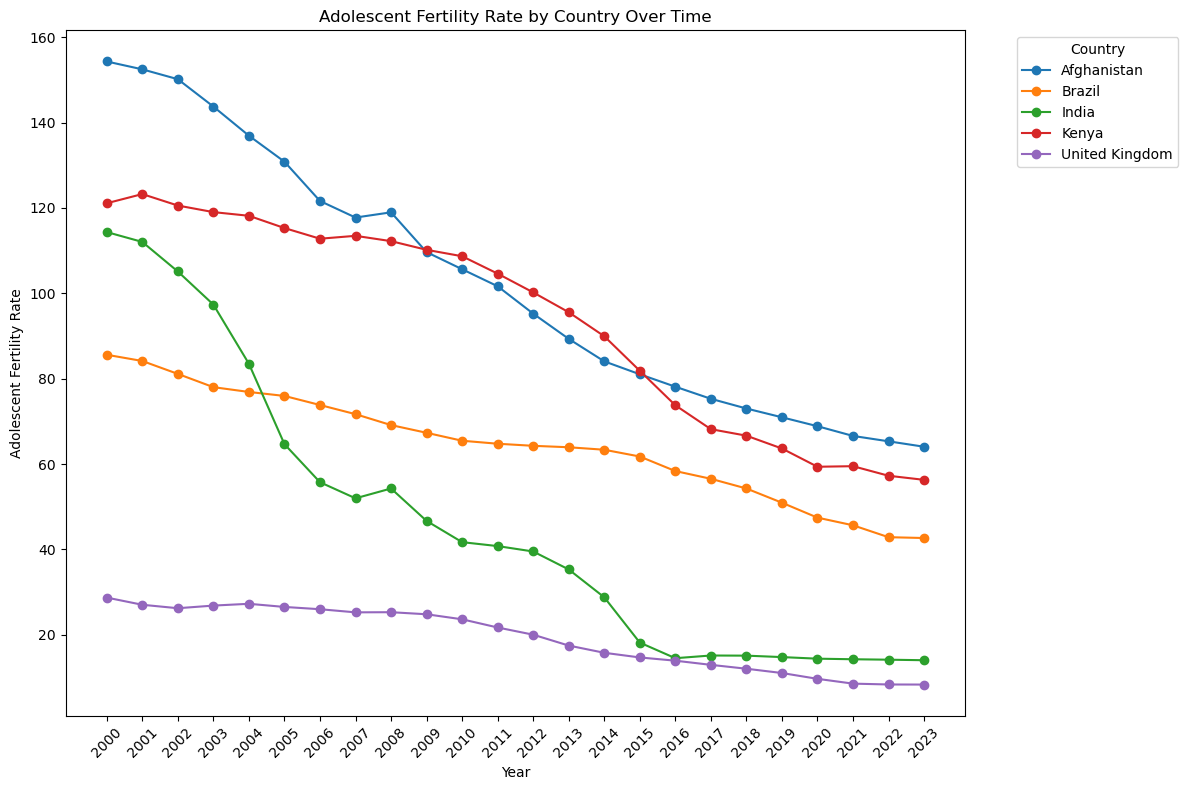

In [ ]:
# Figure 3: Adolescent Fertility Rates from 2000 - 2023

# Prepare the data for plotting
pivot_df = df.pivot(index='year', columns='country', values='adolescent_fertility')

# Plot the line graph
plt.figure(figsize=(12, 8))
pivot_df.plot(ax=plt.gca(), marker='o')
plt.title('Adolescent Fertility Rate by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Adolescent Fertility Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()

plt.savefig("fig-3.png", dpi=300, bbox_inches='tight')

plt.show()

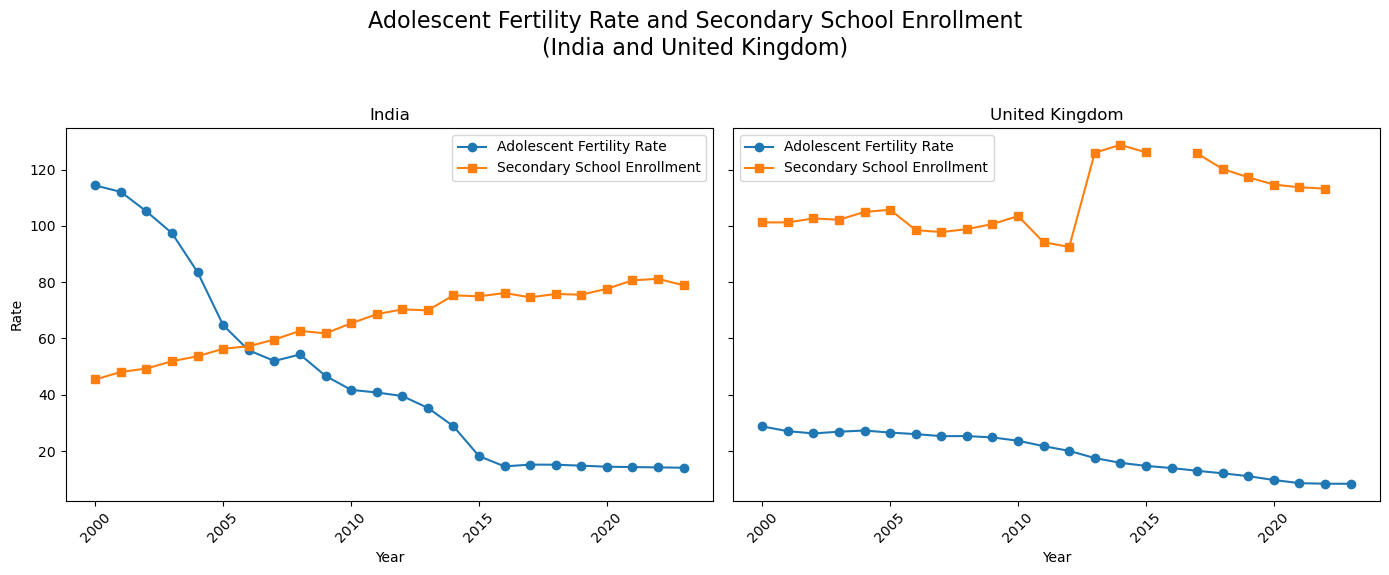

In [8]:
# Figure 4: Adolescent Fertility and Secondary School Enrollment Rates: India and United Kingdom

# Prepare the data for plotting
pivot_df_adolescent_fertility = df.pivot(index='year', columns='country', values='adolescent_fertility')
pivot_df_secondary_school_enrollment = df.pivot(index='year', columns='country', values='secondary_school_enrollment')

# Plot the graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# India
axes[0].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['India'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[0].plot(
    pivot_df_secondary_school_enrollment.index,
    pivot_df_secondary_school_enrollment['India'],
    marker='s',
    label='Secondary School Enrollment',
    color='tab:orange'
)
axes[0].set_title('India')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rate')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# United Kingdom
axes[1].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['United Kingdom'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[1].plot(
    pivot_df_secondary_school_enrollment.index,
    pivot_df_secondary_school_enrollment['United Kingdom'],
    marker='s',
    label='Secondary School Enrollment',
    color='tab:orange'
)
axes[1].set_title('United Kingdom')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle('Adolescent Fertility Rate and Secondary School Enrollment\n(India and United Kingdom)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("fig-4.png", dpi=300, bbox_inches='tight')

plt.show()

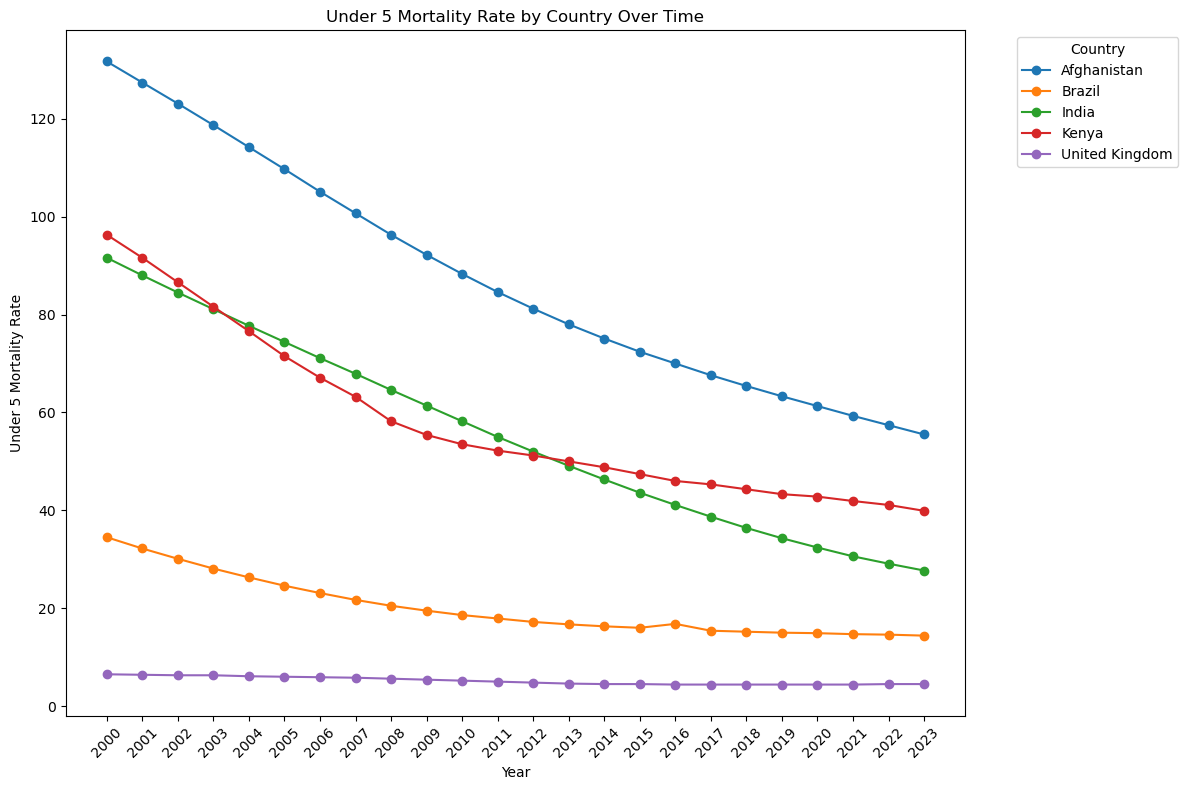

In [9]:
# Figure 5: Under-5 Mortality Rates from 2000 - 2023

# Prepare the data for plotting
pivot_df = df.pivot(index='year', columns='country', values='under5_mortality')

# Plot the line graph
plt.figure(figsize=(12, 8))
pivot_df.plot(ax=plt.gca(), marker='o')
plt.title('Under 5 Mortality Rate by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Under 5 Mortality Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()

plt.savefig("fig-5.png", dpi=300, bbox_inches='tight')

plt.show()

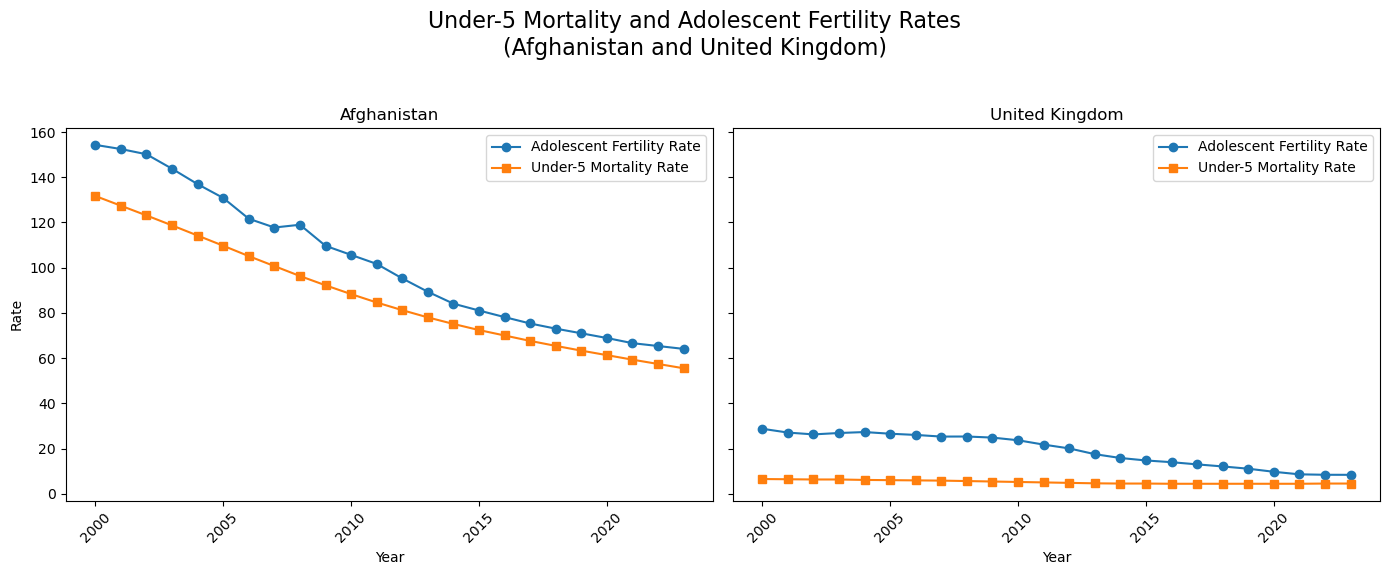

In [10]:
# Figure 6: Under-5 Mortality & Adolescent Fertility Rates: Afghanistan and United Kingdom

# Under 5 Mortality Rate and Adolescent Fertility Rate

# Prepare the data for plotting
pivot_df_under5_mortality = df.pivot(index='year', columns='country', values='under5_mortality')
pivot_df_adolescent_fertility = df.pivot(index='year', columns='country', values='adolescent_fertility')

# Plot the graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Afghanistan
axes[0].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['Afghanistan'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[0].plot(
    pivot_df_under5_mortality.index,
    pivot_df_under5_mortality['Afghanistan'],
    marker='s',
    label='Under-5 Mortality Rate',
    color='tab:orange'
)
axes[0].set_title('Afghanistan')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rate')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# United Kingdom
axes[1].plot(
    pivot_df_adolescent_fertility.index,
    pivot_df_adolescent_fertility['United Kingdom'],
    marker='o',
    label='Adolescent Fertility Rate',
    color='tab:blue'
)
axes[1].plot(
    pivot_df_under5_mortality.index,
    pivot_df_under5_mortality['United Kingdom'],
    marker='s',
    label='Under-5 Mortality Rate',
    color='tab:orange'
)
axes[1].set_title('United Kingdom')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

fig.suptitle('Under-5 Mortality and Adolescent Fertility Rates\n(Afghanistan and United Kingdom)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("fig-6.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Figure 7 is an animation and cannot be saved as an image.

fig = px.scatter(
    df,
    x = "under5_mortality",
    y = "adolescent_fertility",
    title = "Life Expectancy, Under-5 Mortality, and Adolescent Fertility Rate Over Time",
    size = 'life_expectancy_norm',
    color = 'country',
    color_discrete_map = {
        'Brazil': '#ff7f0e',
        'India': 'green',
        'Kenya': 'red',
        'United Kingdom': '#9467bd',
        'Afghanistan': '#1f77b4'
    },
    hover_name = 'country',
    size_max = 60,
    animation_frame = 'year',
    animation_group ='country',
    labels={
        "under5_mortality": "Under-5 Mortality Rate",
        "adolescent_fertility": "Adolescent Fertility Rate",
        "life_expectancy_norm": "Life Expectancy (Normalized)"
    }
)

fig.show()

<Figure size 640x480 with 0 Axes>

In [19]:
# Table 1: Average Life Expectancy from 2017 - 2023

table_1 = (
    df[df['year'].between(2017, 2023)]
    .groupby('country', as_index=False)['life_expectancy']
    .mean()
    .round(3)
)
table_1.columns = ['Country', 'Average Life Expectancy (2017–2023)']
table_1

,Country,Average Life Expectancy (2017–2023)
0,Afghanistan,63.045
1,Brazil,75.013
2,India,70.338
3,Kenya,62.644
4,United Kingdom,81.016


In [18]:
# Table 2: Average Adolescent Fertility Rates from 2017 - 2023

table_2 = (
    df[df['year'].between(2017, 2023)]
    .groupby('country', as_index=False)['adolescent_fertility']
    .mean()
    .round(3)
)
table_2.columns = ['Country', 'Average Adolescent Fertility (2017–2023)']
table_2

,Country,Average Adolescent Fertility (2017–2023)
0,Afghanistan,69.167
1,Brazil,48.643
2,India,14.579
3,Kenya,61.568
4,United Kingdom,10.161


In [17]:
# Table 3: Average Under-5 Mortality Rates from 2017 - 2023

table_3 = (
    df[df['year'].between(2017, 2023)]
    .groupby('country', as_index=False)['under5_mortality']
    .mean()
    .round(3)
)
table_3.columns = ['Country', 'Under-5 Mortality (2017–2023)']
table_3

,Country,Under-5 Mortality (2017–2023)
0,Afghanistan,61.400
1,Brazil,14.886
2,India,32.743
3,Kenya,42.657
4,United Kingdom,4.429
